In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [3]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [4]:
df.index.freq = 'MS'

In [5]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [9]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()
fitted_model

/Users/user/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [10]:
test_pred = fitted_model.forecast(12*3) # 3년
test_pred

1958-02-01    339.142909
1958-03-01    399.281633
1958-04-01    394.233568
1958-05-01    402.545228
1958-06-01    473.128705
1958-07-01    521.795269
1958-08-01    514.513585
1958-09-01    446.216803
1958-10-01    385.430937
1958-11-01    339.645088
1958-12-01    381.455644
1959-01-01    401.210143
1959-02-01    387.159136
1959-03-01    455.812366
1959-04-01    450.049591
1959-05-01    459.538024
1959-06-01    540.114788
1959-07-01    595.671618
1959-08-01    587.358985
1959-09-01    509.392669
1959-10-01    440.000674
1959-11-01    387.732413
1959-12-01    435.462554
1960-01-01    458.013917
1960-02-01    441.973552
1960-03-01    520.346782
1960-04-01    513.768107
1960-05-01    524.599923
1960-06-01    616.584834
1960-07-01    680.007461
1960-08-01    670.517917
1960-09-01    581.513044
1960-10-01    502.296453
1960-11-01    442.627995
1960-12-01    497.115821
1961-01-01    522.860031
Freq: MS, dtype: float64

<AxesSubplot: xlabel='Month'>

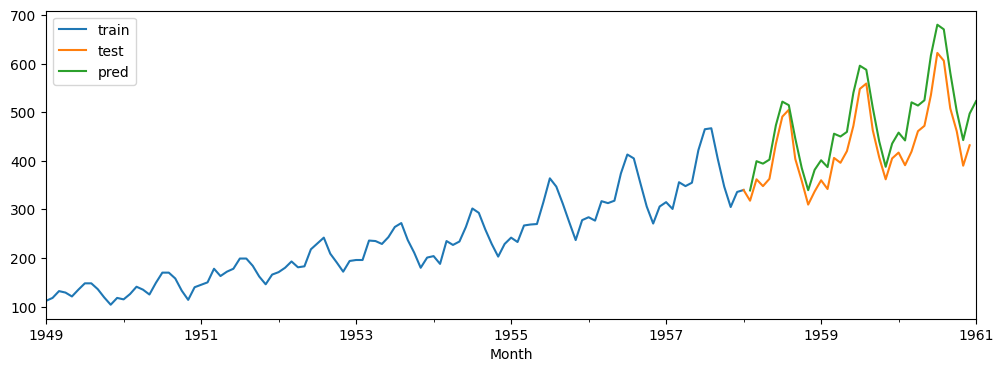

In [17]:
train_data['Thousands of Passengers'].plot(legend=True, label='train', figsize=(12,4))
test_data['Thousands of Passengers'].plot(legend=True, label='test')
test_pred.plot(legend=True, label='pred')

<AxesSubplot: xlabel='Month'>

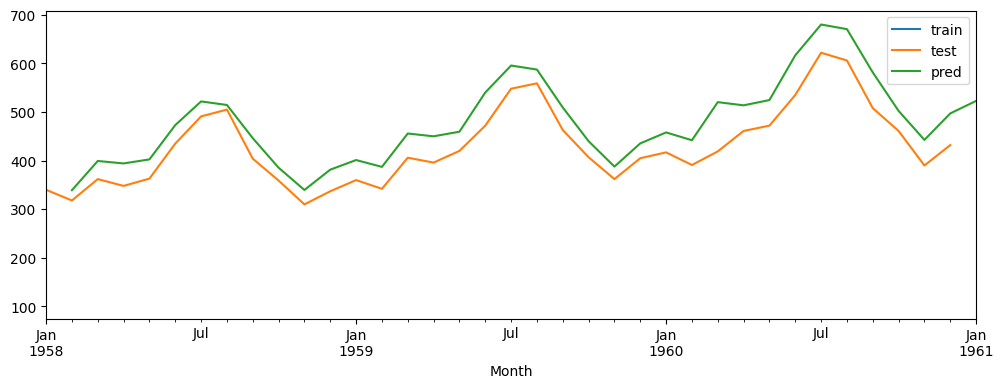

In [16]:
train_data['Thousands of Passengers'].plot(legend=True, label='train', figsize=(12,4))
test_data['Thousands of Passengers'].plot(legend=True, label='test')
test_pred.plot(legend=True, label='pred', xlim=['1958-01-01', '1961-01-01'])